Chapter 02

# 一元OLS线性回归
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
!pip install yfinance
# 需要安装库，下载金融数据

## 导入包

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import yfinance as yf
import statsmodels.api as sm

In [3]:
p = plt.rcParams
p["font.sans-serif"] = ["Roboto"]
p["font.weight"] = "light"
p["ytick.minor.visible"] = False
p["xtick.minor.visible"] = False
p["axes.grid"] = True
p["grid.color"] = "0.5"
p["grid.linewidth"] = 0.5

## 下载股价数据

In [4]:
y_x_df_raw = yf.download(['AAPL','^GSPC'], start='2020-01-01', end='2020-12-31')
y_x_df_raw.head()

[*********************100%%**********************]  2 of 2 completed


Adj Close                   Close                    High  \
                 AAPL        ^GSPC       AAPL        ^GSPC       AAPL   
Date                                                                    
2020-01-02  73.152641  3257.850098  75.087502  3257.850098  75.150002   
2020-01-03  72.441452  3234.850098  74.357498  3234.850098  75.144997   
2020-01-06  73.018692  3246.280029  74.949997  3246.280029  74.989998   
2020-01-07  72.675262  3237.179932  74.597504  3237.179932  75.224998   
2020-01-08  73.844345  3253.050049  75.797501  3253.050049  76.110001   

                               Low                    Open               \
                  ^GSPC       AAPL        ^GSPC       AAPL        ^GSPC   
Date                                                                      
2020-01-02  3258.139893  73.797501  3235.530029  74.059998  3244.669922   
2020-01-03  3246.149902  74.125000  3222.340088  74.287498  3226.360107   
2020-01-06  3246.840088  73.187500  3214.639893  73.447502  3217.550049   
2020-01-07  3244.909912  74.370003  3232.429932  74.959999  3241.860107   
2020-01-08  3267.070068  74.290001  3236.669922  74.290001  3238.590088   

               Volume              
                 AAPL       ^GSPC  
Date                               
2020-01-02  135480400  3459930000  
2020-01-03  146322800  3484700000  
2020-01-06  118387200  3702460000  
2020-01-07  108872000  3435910000  
2020-01-08  132079200  3726840000

In [5]:
y_x_df_raw.to_csv('y_x_df_raw.csv')
y_x_df_raw.to_pickle('y_x_df_raw.pkl')
# 如果不能下载，就用pandas.read_csv() 或 pandas.read_pickle() 读入
# 建议使用 pandas.read_pickle() 
# y_x_df_raw = pd.read_csv('y_x_df_raw.csv')
# y_x_df_raw = pd.read_pickle('y_x_df_raw.pkl')

## 计算收益率

In [6]:
# 收盘价，计算日回报率
y_x_df = y_x_df_raw['Adj Close'].pct_change()
y_x_df.dropna(inplace = True)

In [7]:
y_x_df.rename(columns={"^GSPC": "SP500"},inplace = True)

In [8]:
y_x_df.head()

,AAPL,SP500
Date,,
2020-01-03,-0.009722,-0.007060
2020-01-06,0.007968,0.003533
2020-01-07,-0.004703,-0.002803
2020-01-08,0.016086,0.004902
2020-01-09,0.021241,0.006655


In [9]:
x_df = y_x_df[['SP500']]
y_df = y_x_df[['AAPL']]

## 数据分析

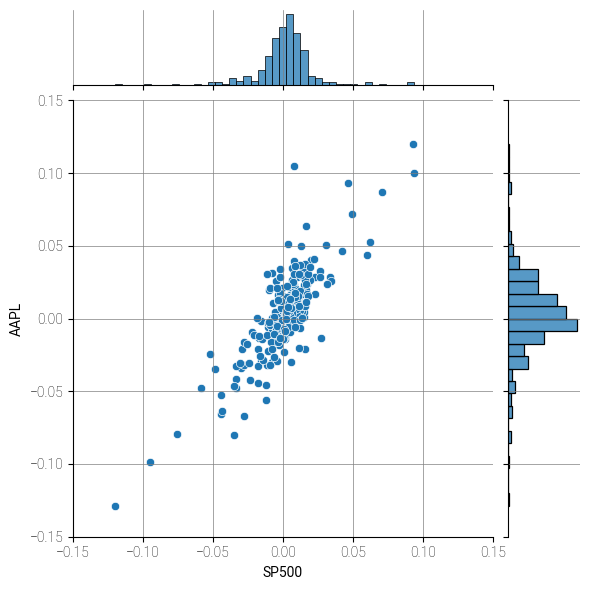

In [10]:
#%% Data analysis

sns.jointplot(data=y_x_df, x="SP500", y="AAPL", kind = 'scatter',
              xlim = [-0.15,0.15],ylim = [-0.15,0.15])

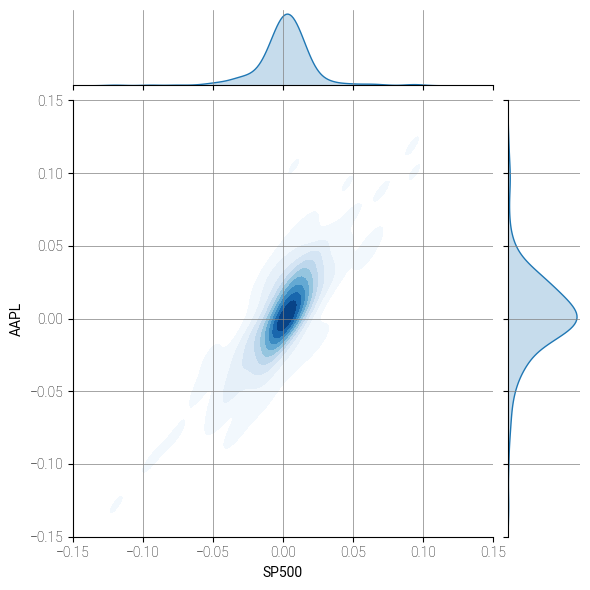

In [11]:
# marginal and joint KDE plots
sns.jointplot(data=y_x_df, x="SP500", y="AAPL",
              kind="kde", cmap = 'Blues', fill = True,
              xlim = [-0.15,0.15],ylim = [-0.15,0.15])

## 协方差矩阵

[0.02946919 0.02176789]


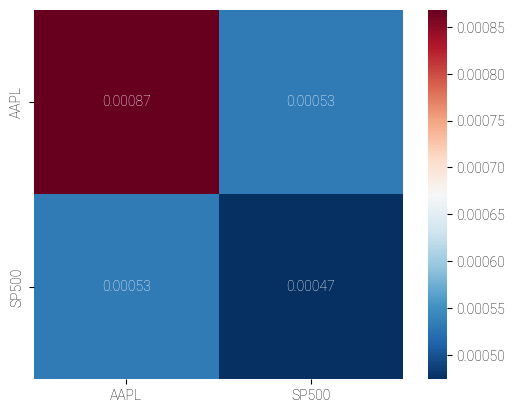

In [12]:
SIGMA = y_x_df.cov()

fig, axs = plt.subplots()

h = sns.heatmap(SIGMA, annot=True,cmap='RdBu_r')
h.set_aspect("equal")
print(np.sqrt(np.diag(SIGMA)))

## 相关系系数矩阵

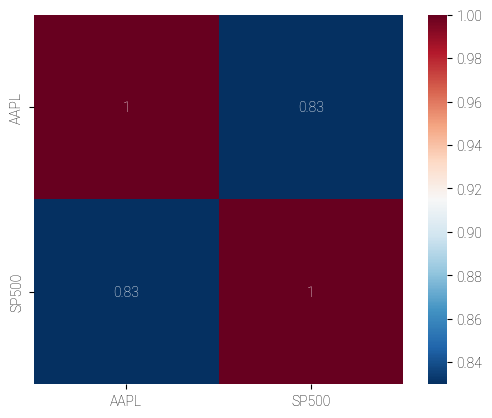

In [13]:
RHO = y_x_df.corr()

fig, axs = plt.subplots()

h = sns.heatmap(RHO, annot=True,cmap='RdBu_r')
h.set_aspect("equal")

## 相关系转换为角度

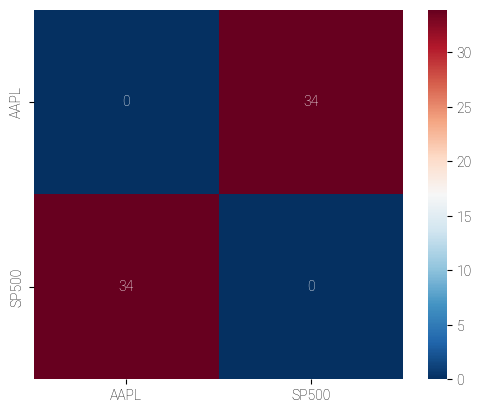

In [14]:
Angles = np.arccos(RHO)*180/np.pi
fig, axs = plt.subplots()

h = sns.heatmap(Angles, annot=True,cmap='RdBu_r')
h.set_aspect("equal")

## 向量

In [15]:
def draw_vector(vector,RBG): 
    array = np.array([[0, 0, vector[0], vector[1]]])
    X, Y, U, V = zip(*array)
    plt.quiver(X, Y, U, V,angles='xy', scale_units='xy',scale=1,color = RBG)

angle = Angles['AAPL']['SP500']*np.pi/180

vols = np.sqrt(np.diag(SIGMA))
v_1_x = vols[1]
v_1_y = 0

v_2_x = vols[0]*np.cos(angle)
v_2_y = vols[0]*np.sin(angle)

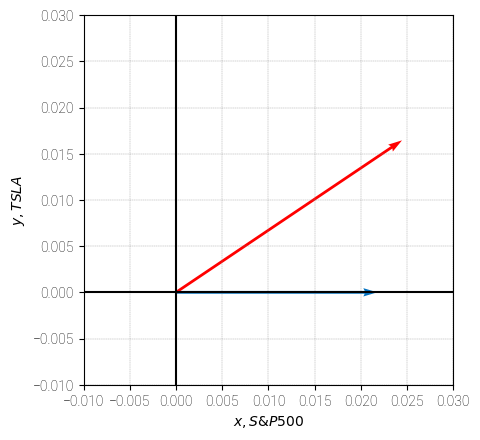

In [16]:
fig, ax = plt.subplots()

draw_vector([v_1_x,v_1_y],np.array([0,112,192])/255)
draw_vector([v_2_x,v_2_y],np.array([255,0,0])/255)
plt.ylabel('$y, TSLA$')
plt.xlabel('$x, S&P500$')
plt.axis('scaled')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
ax.set_xlim([-0.01, 0.03])
ax.set_ylim([-0.01, 0.03])
ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])

## OLS线性回归

In [17]:
# 增加一列全1
X_df = sm.add_constant(x_df)

model = sm.OLS(y_df, X_df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     550.5
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           5.16e-65
Time:                        16:38:00   Log-Likelihood:                 675.37
No. Observations:                 251   AIC:                            -1347.
Df Residuals:                     249   BIC:                            -1340.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.001      1.819      0.0

## 可视化

In [18]:
p = model.fit().params

# generate x-values for  regression line
x = np.linspace(x_df.min(),x_df.max(),10)

In [19]:
p

const    0.001893
SP500    1.123350
dtype: float64

(-0.15, 0.15)

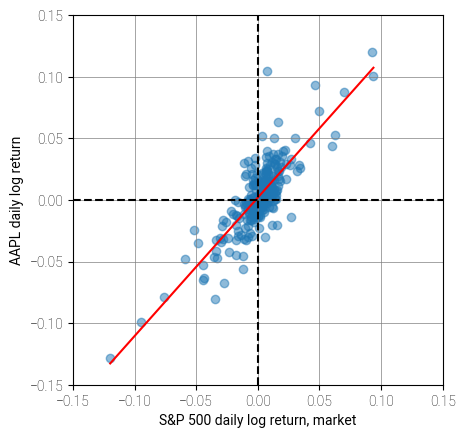

In [20]:
fig, ax = plt.subplots()

# scatter-plot data
plt.scatter(x_df, y_df, alpha = 0.5)

plt.plot(x, p.const + p.SP500 * x,color = 'r')

plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.axis('scaled')
plt.ylabel('AAPL daily log return')
plt.xlabel('S&P 500 daily log return, market')
plt.xlim([-0.15,0.15])
plt.ylim([-0.15,0.15])

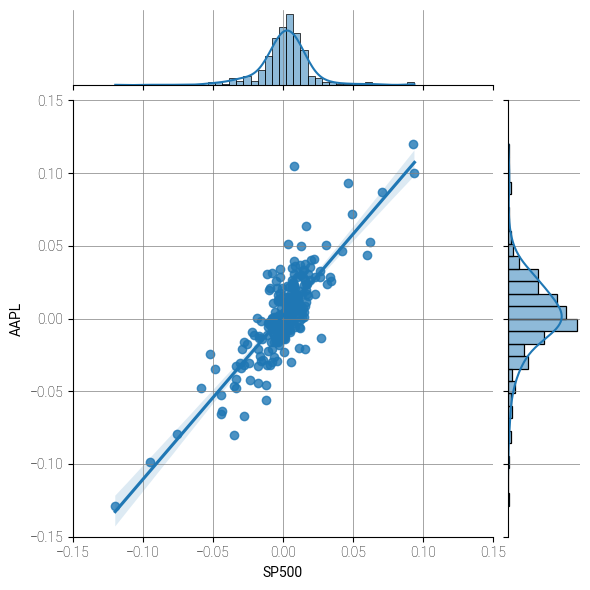

In [21]:
sns.jointplot(x=x_df['SP500'], y=y_df['AAPL'], kind="reg",
              xlim = [-0.15,0.15],ylim = [-0.15,0.15])